# Variable Substitution

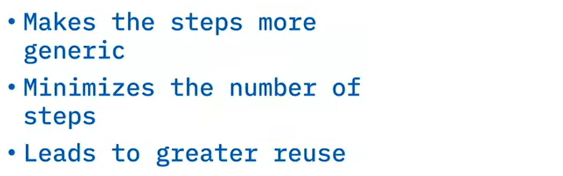

You can use variable substitution to make your Python steps more generic.
* Often you have sentences in your feature file that only differ by a name field or a value, and they have identical implementations except for this name or data value.
* By changing these words in the sentence to variables, you don’t need to write as many Python steps because one step can now match multiple sentences in your feature file.
* This leads to greater **reuse**, and it’s always a good idea to **make steps as generic as possible for maximum reuse**.

# Scenario to create a pet

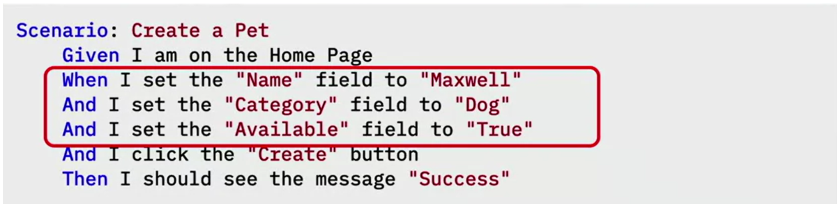

Let’s start with a scenario to create a pet.

This one says, 
```
Given I am on the Home Page, 
When I set the ‘Name’ field to ‘Maxwell’ 
And I set the ‘Category’ field to ‘Dog,’ 
And I set the ‘Available’ to ‘True’ 
And I click the ‘Create’ button, 
Then I should see the message ‘Success’
```

Notice the three similar sentences in the middle.

```
When I set the ‘Name’ field to ‘Maxwell,’ 
And I set the ‘Category’ field to ‘Dog’
And I set the ‘Available’ field to ‘True’
```

are the same sentence aside from the field names and the data.

Only the field name and the data are different.

Let’s look at how to implement steps for those sentences:
* without variable substitution, and 
* then with variable substitution.

# Without variable substitution

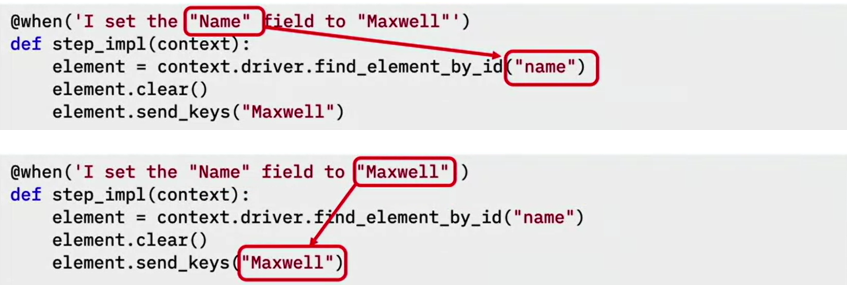

As you might expect, those three sentences require three steps to match them.
* In the first step, you use the **lowercase** version of the **field name** as the element ID.
* The assumption is that the user interface has a field with an ID of that name.
* Likewise, you take the data, which is the `text` string, and send that to the field using the `send_keys()` function.

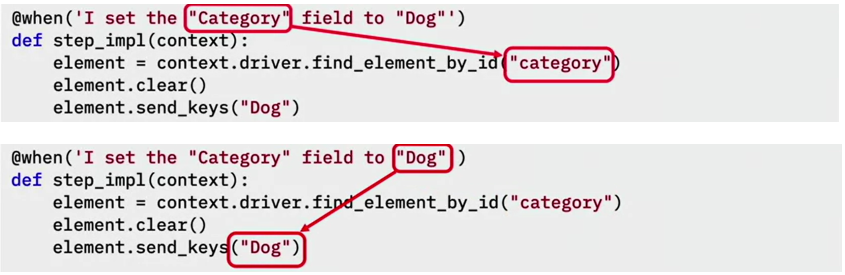

You handle the next steps in the same way.!

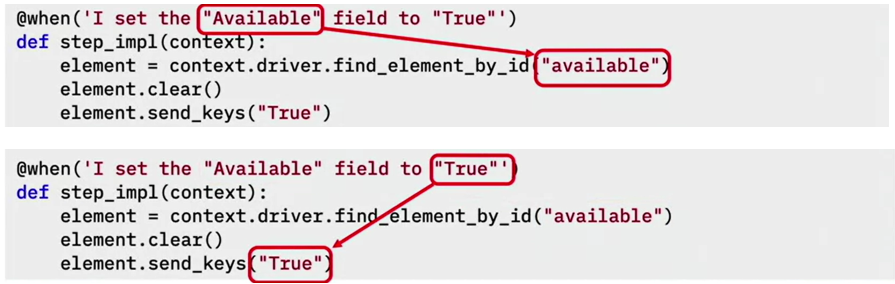

You use the field’s **lowercase** name and use the `send_keys()` function to send the `text` string from the feature sentence.

**Notice the consistency**.
* The field name is always the lowercase version of the name in the statement.
* Likewise, you always send the text string unaltered as the data.
* You can take advantage of these two facts and create one step that uses variable substitution to satisfy all these statements.

The worst part of this code is that the implementations are identical except for the hardcoded strings for the element name and data.

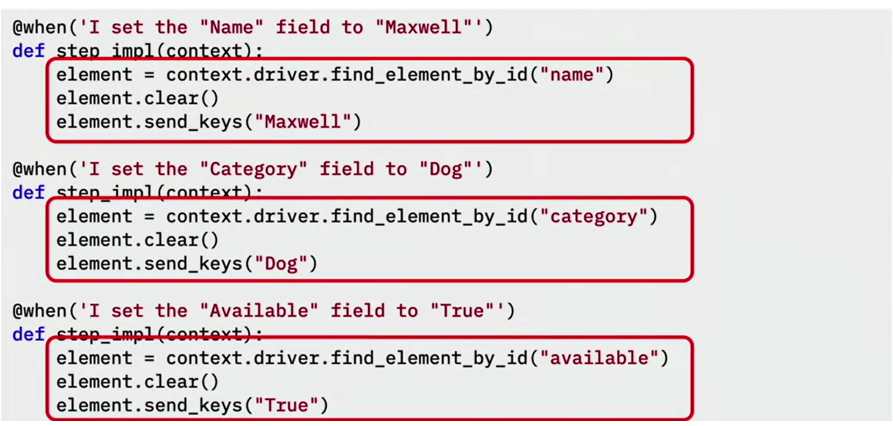

# How to substitute a variable?

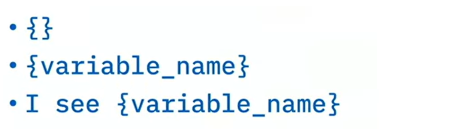

The **rules for substituting a variable** are simple.
* You start with two curly braces.
* When Behave sees an open curly brace in the step string, it knows that what comes after it until the closed curly brace will be a **variable name**.
* Next, you **create a variable name** to replace the data in the string.
* As usual with Python variable names, you can’t have spaces in them, but you can delimit them with underscores.
* Then **in the string**, you **substitute the variable name enclosed in curly braces**.
* Behave will take whatever text that shows up in the position and assign it to the variable by that name.
* This variable then gets passed into your function as a parameter.


# Variable analysis

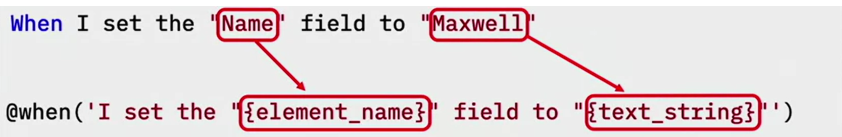

Let’s analyze the first of those three statements in the feature file: 
* **“When I set the ‘Name’ field to ‘Maxwell’”**.
* The words in that sentence that will change are **“Name”** and **“Maxwell”**.
* As shown here, it’s a best practice to place quotes around them to indicate that these are the words that you will be substituting in the string.
* Using quotes also helps Behave do its string matching.
* You don’t have to but trust me on this one: it’s a good idea.

Then you move to your Python steps function.
* In the decorator’s string, you **create two variable names**: 
    * one for the "`name`" called `{element_name}` and 
    * one for the **actual data** called `{text_string}`.
* You can name these however you like, but these names are appropriate.

Let’s see how you use these in the actual step function implementation.

# With variable substitution

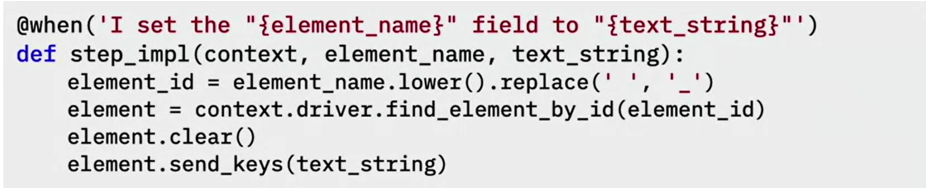

You start with the `@when` decorator and the **string with the two variables** defined.
* In your step implementation, you **add two additional parameters with the same variable names as the variables in the step string**.
* You can now use these variable names in your function as substitutes for whatever strings are passed in from the feature file.
* Remember that the **element ID** will be the lowercase version of the field name.
* So you add a line of code that takes the lowercase version, and to ensure that you have a valid HTML ID, you replace any spaces with underscores.
* You assign the `ID` to a variable called `element_id`.
* Then you call `context.driver.find_element_by_ID` and pass in that **element ID** to get the actual element.
* Once you have the element, you clear it to make sure that it has no data before you send new data.
* Lastly, you call `send_keys()` on that element and pass in the `text_string` variable.
* That text_string variable will contain whatever text is enclosed in the double quotes in the feature file statement.
* This is why I like using double quotes: it gives a helpful visual representation of how the string will be parsed.

Now Behave can match all three of the feature file’s statements with just one step function, and all of them will manipulate the correct field and send the correct data.

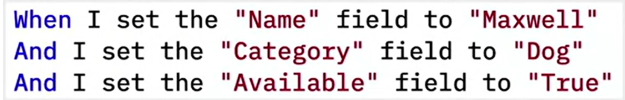

That’s all there is to using variable substitution.

# Maximum Reuse

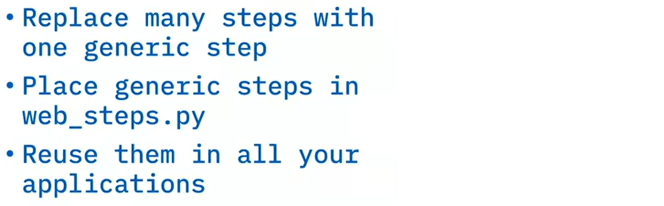

**The beauty of this is that you can replace an enormous number of steps with just one generic step.**
* In this example, three steps became one step.
* But as you can imagine, you will be typing a lot of text into a lot of fields on a lot of web pages.
* They can all use that single step that uses variable substitution.
* Steps like this are good candidates for the `web_steps.py` file, which is where I like to place all of my generic web steps.
* Then you can reuse those steps on all of your applications because typing text into a field is the same no matter what the application is doing.

**This is how you can write a minimum number of steps and gain maximum reuse by using variable substitution.**

# Summary

**Variable substitution reduces the steps needed and maximizes reuse**.

To substitute variables, you:
* Replace data in the decorator string with variables enclosed by curly braces.
* Add step implementation parameters with the same names as those variables.
* Substitute those variable names in place of the strings passed in from the feature file.